In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import numpy as np

patient_df = pd.read_csv('rr/patient-info.csv')

In [189]:
patient_df.describe()

,File,Age
count,147.000000,147.000000
mean,3084.326531,5.713973
std,1661.459468,10.567148
min,0.000000,0.083000
25%,426.500000,0.420000
50%,4037.000000,1.000000
75%,4081.500000,6.000000
max,4123.000000,55.000000


In [190]:
patient_df.head()

,File,Age,Gender
0,0,53.0,M
1,2,17.0,F
2,3,46.0,F
3,5,38.0,F
4,6,32.0,M


In [211]:
import heartpy as hp
for index, row in patient_df.iterrows():
    try:
        file_path = f'rr/{str(row[0]).zfill(3)}.txt'
        series = pd.read_csv(file_path, header=None).squeeze()
        timestamps = pd.TimedeltaIndex([x*7.8125 for x in range(0, len(series))])
        series = series.set_axis(timestamps)
        rr = hp.process(series, sample_rate=128)
        print(row[0], ".txt ", row[1], "years -", rr[1]['breathingrate'] * 60)
        patient_df.at[index, 'respiration_rate'] = rr[1]['breathingrate'] * 60
    except Exception as e:
        patient_df.at[index, 'respiration_rate'] = 0
        #print("Error while calculating breathing rate", e)
patient_df.to_csv('patients_with_breathing')

0 .txt  53.0 years - 20.570840833119053
2 .txt  17.0 years - 7.650621613006058
3 .txt  46.0 years - 14.0
5 .txt  38.0 years - 14.566642388929353
6 .txt  32.0 years - 13.036393264530147
7 .txt  51.0 years - 16.966726364407577
9 .txt  24.0 years - 11.300499105377154
10 .txt  55.0 years - 13.972985561248253
11 .txt  17.0 years - 16.0
13 .txt  39.0 years - 16.0
401 .txt  12.0 years - 14.0
402 .txt  10.0 years - 16.78008762934651
403 .txt  13.0 years - 10.0
404 .txt  5.0 years - 10.0
405 .txt  15.0 years - 12.0
406 .txt  15.0 years - 12.0
407 .txt  6.0 years - 10.0
408 .txt  13.0 years - 20.29083530605343
409 .txt  10.0 years - 8.0
410 .txt  12.0 years - 12.164216928535224
411 .txt  8.0 years - 10.0
412 .txt  8.0 years - 16.0
413 .txt  12.0 years - 12.36730907966608
414 .txt  11.0 years - 8.0
415 .txt  11.0 years - 12.0
416 .txt  11.0 years - 16.0
418 .txt  10.0 years - 16.0
419 .txt  14.0 years - 14.002333722287048
420 .txt  10.0 years - 18.0


c:\users\andi\documents\github\fh-mc-wc\exercises\ue04\venv\lib\site-packages\numpy\ma\core.py:5288: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\users\andi\documents\github\fh-mc-wc\exercises\ue04\venv\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


421 .txt  12.0 years - 15.847860538827259
422 .txt  7.0 years - 14.0
423 .txt  11.0 years - 8.0
424 .txt  7.0 years - 0.0
426 .txt  12.0 years - 10.0
427 .txt  9.0 years - 14.0


c:\users\andi\documents\github\fh-mc-wc\exercises\ue04\venv\lib\site-packages\numpy\ma\core.py:5288: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\users\andi\documents\github\fh-mc-wc\exercises\ue04\venv\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


4000 .txt  0.42 years - 13.042060645582
4001 .txt  0.58 years - 16.0
4002 .txt  1.08 years - 8.0
4004 .txt  0.17 years - 16.0
4005 .txt  0.33 years - 14.0
4006 .txt  0.25 years - 11.60541586073501
4007 .txt  0.42 years - 10.0
4008 .txt  0.75 years - 10.0
4009 .txt  0.083 years - 0.0
4010 .txt  0.5 years - 12.0
4011 .txt  0.42 years - 14.0
4012 .txt  0.42 years - 8.0
4013 .txt  1.75 years - 16.0
4014 .txt  0.75 years - 14.0
4015 .txt  1.17 years - 16.0
4016 .txt  1.17 years - 14.0
4017 .txt  0.33 years - 16.0
4018 .txt  0.42 years - 8.0
4019 .txt  0.42 years - 18.0


c:\users\andi\documents\github\fh-mc-wc\exercises\ue04\venv\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


4020 .txt  2.25 years - 10.0
4021 .txt  0.42 years - 12.0
4022 .txt  0.75 years - 12.0
4024 .txt  0.083 years - 8.0
4025 .txt  1.0 years - 18.0
4026 .txt  0.67 years - 12.0
4027 .txt  0.5 years - 16.0
4028 .txt  0.58 years - 10.0
4029 .txt  0.5 years - 10.0
4030 .txt  0.75 years - 10.0
4031 .txt  0.58 years - 12.0
4032 .txt  0.67 years - 12.0
4033 .txt  0.33 years - 10.0
4034 .txt  0.75 years - 0.0
4035 .txt  0.42 years - 14.0
4037 .txt  0.33 years - 19.083969465648856
4038 .txt  0.83 years - 8.0
4039 .txt  0.42 years - 0.0
4040 .txt  0.17 years - 18.0
4041 .txt  0.083 years - 10.0
4042 .txt  1.08 years - 20.0
4043 .txt  1.67 years - 8.0
4045 .txt  1.0 years - 8.0
4046 .txt  2.83 years - 20.0
4047 .txt  2.75 years - 10.0
4049 .txt  0.5 years - 16.0
4050 .txt  0.83 years - 16.0
4051 .txt  2.08 years - 10.0
4052 .txt  0.17 years - 16.0
4054 .txt  1.75 years - 12.0
4055 .txt  0.83 years - 10.650761529449357
4056 .txt  0.75 years - 8.0
4058 .txt  0.42 years - 10.0
4059 .txt  0.25 years - 1

In [194]:
file_path = f'rr/{str(patient_df.iloc[0]["File"]).zfill(3)}.txt'
series = pd.read_csv(file_path, header=None).squeeze()
timestamps = pd.TimedeltaIndex([x*7.8125 for x in range(0, len(series))])
series = series.set_axis(timestamps)

80441

In [195]:
resampled_data = signal.resample(series, 200)

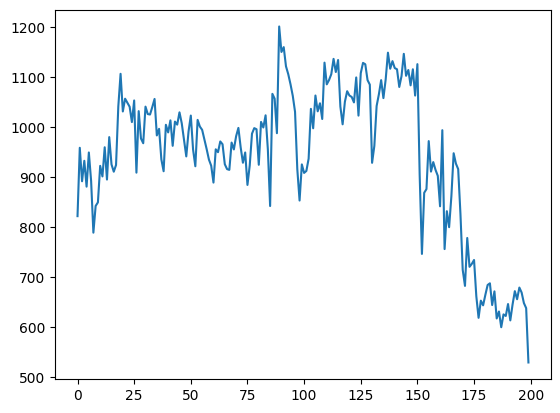

In [196]:
offset_series = pd.concat([pd.Series([0]), series])
for i in range(0, len(series)):
    x = offset_series.iloc[i]
#    y = series.iloc[i]
#    series.iloc[i] = y - x
series.plot(figsize=(25,10))

In [197]:
fft_data = np.abs(fft(resampled_data))

In [204]:
peak = np.mean(resampled_data)
peak

943.3881975609454

In [206]:
# Calculate the breathing rate (in breaths per minute)
breathing_rate = 1 / peak * 60 * 1000

print("Breathing rate:", breathing_rate, "breaths per minute")

Breathing rate: 63.600541277837905 breaths per minute
